In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
first_read = pd.read_csv('/home/data_ap/testtask/first_read2.csv', delimiter = ';', names = ['my_date', 'event', 'country', 'user_id', 'source', 'topic'])

In [3]:
returned_read = pd.read_csv('/home/data_ap/testtask/returned_read2.csv', delimiter = ';', names = ['my_date', 'event', 'country', 'user_id', 'topic'])

In [4]:
subscribe = pd.read_csv('/home/data_ap/testtask/subscribe2.csv', delimiter = ';', names = ['my_date', 'event', 'user_id'])

In [5]:
buy = pd.read_csv('/home/data_ap/testtask/buy2.csv', delimiter = ';', names = ['my_date', 'event', 'user_id', 'price'])

### Linear Regressions, trends

In [6]:
# first_reads
fr = first_read.groupby(by = 'my_date').count().user_id.reset_index(drop = 'True')

In [7]:
fr.head()

0    1795
1    1812
2    1816
3    1849
4    1876
Name: user_id, dtype: int64

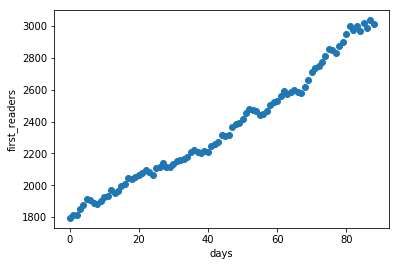

In [8]:
x = fr.index
y = fr.values
plt.xlabel('days')
plt.ylabel('first_readers')
plt.scatter(x, y)

In [9]:
coefs = np.polyfit(x, y, 2)
predict = np.poly1d(coefs)

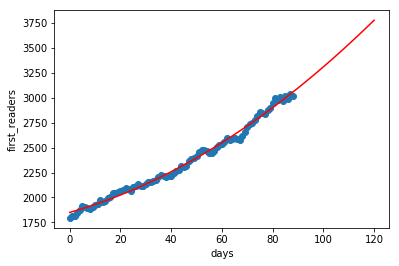

In [10]:
x_test = np.linspace(0, 120)
y_pred = predict(x_test[:, None])
plt.xlabel('days')
plt.ylabel('first_readers')
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [11]:
coefs

array([7.31752427e-02, 7.26837572e+00, 1.85003753e+03])

In [12]:
fr.tail()

84    2971
85    3019
86    2989
87    3037
88    3013
Name: user_id, dtype: int64

In [13]:
predict(120)

3775.966107791217

In [14]:
# R squared
from sklearn.metrics import r2_score

In [15]:
# apply only for linear (1d) regression
r2_score(y, predict(x))

0.9925242353965812

In [16]:
# returned_readers trend
rr = returned_read.groupby(by = 'my_date').count()[['user_id']]

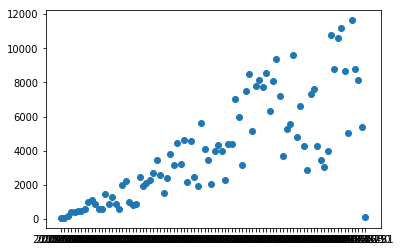

In [17]:
x = rr.index
y = rr.values
plt.scatter(x, y)

In [18]:
# subscribers trend
subs = subscribe.groupby(by = 'my_date').count()[['user_id']]

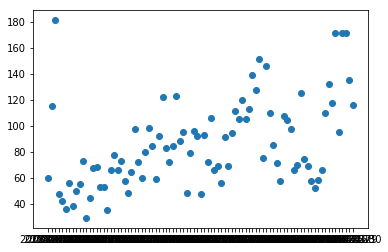

In [19]:
x = subs.index
y = subs.values
plt.scatter(x, y)

In [20]:
# purchase trend
purchase = buy.groupby(by = 'my_date').count()[['user_id']]

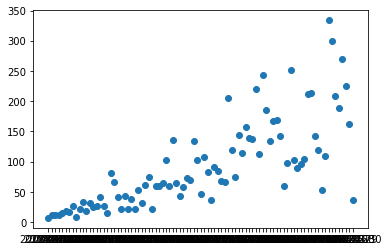

In [21]:
x = purchase.index
y = purchase.values
plt.scatter(x, y)

### Products ratio, trends

In [22]:
products = first_read.merge(buy, on = 'user_id')

In [23]:
books = products[products.price == 8]
books = books.groupby( by = 'country').count()[['price']]
#books

In [24]:
videos = products[products.price == 80]
videos = videos.groupby( by = 'country').count()[['price']]
#videos

In [25]:
books/videos

,price
country,
country_1,2.777778
country_2,4.117143
country_3,3.294118
country_4,3.537217
country_5,3.738140
country_6,3.513158
country_7,3.844011
country_8,3.148148


In [26]:
books_trend = products[products.price == 8].groupby(by = 'my_date_y').count().price
#books_trend

In [27]:
videos_trend = products[products.price == 80].groupby(by = 'my_date_y').count().price
#videos_trend

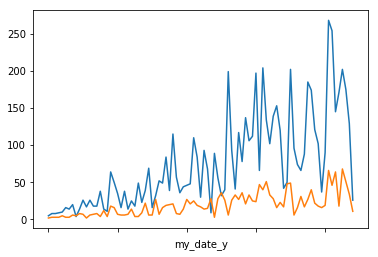

In [28]:
books_trend.plot()
videos_trend.plot()